In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import numpy as np
import scipy.stats as st
import pandas as pd
import random

Un proceso estocástico {$X_t;\geq 0$} se dice que es estacionario si $X_{t_1},X_{t_2},...,X_{t_n}$ tiene la misma distribución conjunta que $X_{t_{1}+a},X_{t_{2}+a},...,X_{t_{n}+a}$. Suponga que {$X_t;t\geq 0$} es un movimiento Browniano y sea $V_t=e^{-\frac{\alpha t}{2}}X_{\alpha e^{\alpha t}}$. Muestre que {$V_t;t\geq 0$} es un proceso Gaussiano estacionario. El proceso {$V_t;t\geq 0$} se llama proceso de Ornstein Uhlenbeck

>Sea $V_t=e^{-\frac{\alpha t}{2}}X_{\alpha e^{\alpha t}}$ \\
$V_t=e^{-\frac{\alpha t}{2}}a^{\frac{1}{2}}e^{\frac{\alpha t}{2}}X_1$ \\
$V_t=\alpha^{\frac{1}{2}} X_1$

In [38]:
trayectorias = 10000
puntos = 365
delta_t = 1/puntos
t = np.linspace(0,1,puntos+1)

In [34]:
alpha = 0.2
def OU(alpha, numTrayectorias, numPuntos):
  o = np.zeros((numTrayectorias, numPuntos+1))
  for i in range(numTrayectorias):
    for j in range(numPuntos+1):
      o[i,j] = np.sqrt(alpha)* np.random.normal(0, 1)
  return o

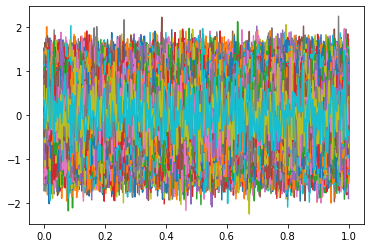

In [35]:
o = OU(alpha,trayectorias,puntos)
for i in range(len(o)):
  plt.plot(t, o[i, :])
plt.show()

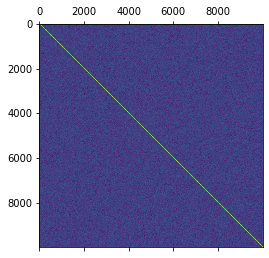

In [36]:
cov=np.cov(o)
plt.matshow(cov)

>Con la gráfica de la covarianza se puede evidenciar que no depende de t 

In [37]:
normalidad=0
for i in range(puntos+1):
  stat, prob= st.jarque_bera(o[:,i])
  if prob>0.05:
    normalidad+=1
print('Porcentaje de instantes de tiempo normales',normalidad*100/puntos)

Porcentaje de instantes de tiempo normales 94.79452054794521


>Podemos observar que el porcentaje de instantes de tiempos normales es superior al 94.79% por lo que podemos decir que es gaussiano y estacionario